#  Introdução

## Contexto
Funcionários são considerados o recurso mais valioso de qualquer organização. O custo associado à formação e capacitação profissional de um colaborador são elevados e promover a lealdade do quadro de funcionários dentro de uma organização torna-se fundamental, ao longo dos anos, para evitar o desgaste e evasão profissional. Embora em graus variados, o desgate de funcionários gera custos a uma empresa e evitar tais prejuízos financeiros é um desafio constante na vida de um empregador.

A análise exploratória abaixo foi desenvolvida durante os meus estudos para o Clube de Assinatura de Ciência de Dados criado pelo [André Yukio](https://www.linkedin.com/in/andreyukio/). A ideia da análise é explorar um dataset ficctício criado pos cientistas de dados da IBM verificando questões importantes que podem ser variáveis de desgate de funcionários da empresa, motivando o desligamento dos mesmos.

## Análises exploradas

* **Análise por gênero e idade**

1. Distribuição de idade por gênero
2. Distribuição de satisfação do trabalho por gênero
3. Salário por Gênero
4. Presença de homens e mulheres por departamento

* **Análise por distância do trabalho ou viagens a serviço**
4. Quais os efeitos da distância de casa ao trabalho no desgate dos colaboradores?
5. como o desgate foi afetado por viagens de trabalho?
6. Pessoas saíram da empresa por conta da distância de casa até o trabalho ou por conta de viagens a trabalho?

* **Ambiente de trabalho**
7. Qual o departamento que mais teve turnover?
8. O departamento impactou diretamente no desgate do colaborador?
9. Como a satisfação com o ambiente de trabalho afetou no desgate do colaborador?
10. É possível que colaboradores tenham deixado a empresa por conta do ambiente de trabalho?

## Fonte do Dataset

O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle, através do [link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset). Esse conjunto de dados é ficcticio, porém traz informações relevantes para o levantamento de algumas premissas relevantes que poderiam ajudar na elucidação de fatores que ajudam na decisão de desligamento de um funcionário da empresa em questão.

# Análise Exploratória

## Importação de bibliotecas

In [69]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento e análise estrutural do dataset

In [70]:
rh = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [71]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [72]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [73]:
print(f'Numero de linhas do dataset: {rh.shape[0]}')
print(f'Numero de colunas do dataset: {rh.shape[1]}')

Numero de linhas do dataset: 1470
Numero de colunas do dataset: 35


In [74]:
#Null Values
rh.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [75]:
#Valores duplicados
print(f'Valores duplicados no dataset:{rh.duplicated().sum()}')

Valores duplicados no dataset:0


In [76]:
#Variáveis numéricas e categóricas
col_num = rh.select_dtypes('number')
col_cat = rh.drop(columns=col_num)

print('Variaveis numéricas:\n')
for col in col_num:
    print(col)

print('\nVariaveis categóricas:\n')
for col in col_cat:
    print(col)

Variaveis numéricas:

Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager

Variaveis categóricas:

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [77]:
#Variáveis de valor binário
rh.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

As variáveis binárias do dataset são: **Gênero, Atrito, Classificação de desempenho, Hora Extra**. Nas próximas seções, vou explorar melhor o entendimento dessas colunas.

In [78]:
#Descrição de alguns detalhes estatísticos do dataset
rh.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Análises Exploradas

### Análise por gênero e idade

Nesta seção tentaremos ver se há alguma discrepância entre homens e mulheres na organização. Também vamos obervar informações básicas como idade, satisfação no emprego, média salarial, etc.

**Questões a serem respondidas nesta seção:**

1. Qual a distribuição de idade entre homens e mulheres? Há alguma discrepância significativa?
2. Qual a média de satisfação no trabalho por gênero? Há algum gênero mais insatisfeito que outro?
3. Qual a média salarial por gênero? Qual o número de empregados por gênero em cada departamento?
4. Como o Desgaste é observado por gênero?

#### Distribuição de idade por gênero


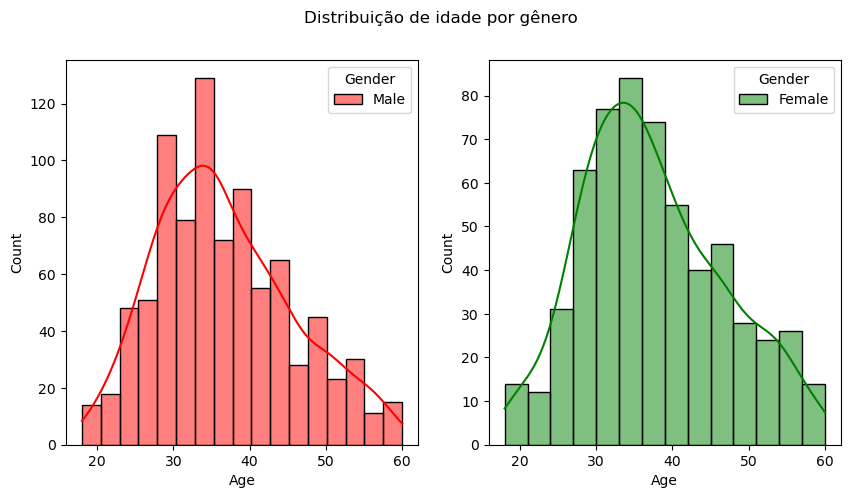

In [79]:
w = rh[rh['Gender'] == 'Female']
m = rh[rh['Gender'] == 'Male']
plt.style.use('default')

fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Distribuição de idade por gênero')

sns.histplot(data=m, x='Age', hue='Gender', ax=axes[0], kde=True, palette=['red'])
sns.histplot(data=w, x='Age', hue='Gender', ax=axes[1], kde=True, palette=['green']);

In [80]:
print(f'Idade média de colaboradore homens: {m.Age.mean():.2f}')
print(f'Idade média de colaboradore mulheres: {w.Age.mean():.2f}')

Idade média de colaboradore homens: 36.65
Idade média de colaboradore mulheres: 37.33


Observando a distribuição de idades entre homens e mulheres e calculando a média de idade entre esses públicos, percebe-se que não há uma discrepância significativa entre os gêneros dos colaboradores.

#### Insatisfação por gênero

Legenda JobSatisfaction: 

1. Low
2. Medium
3. High
4. Very High

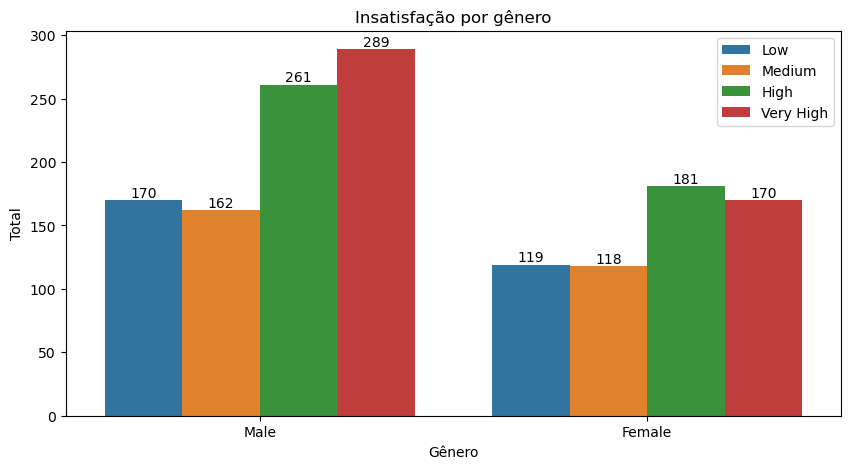

% de insatisfação de colaboradores do sexo masculino:  62.36 %
% de insatisfação de colaboradores do sexo feminino:  59.69 %


In [81]:
#Insatisfação por gênero
plt.figure(figsize=(10,5))
plt.title('Insatisfação por gênero')
_= sns.countplot(x=rh['Gender'], order=rh['Gender'].value_counts(ascending=False,).index, hue=rh['JobSatisfaction'])
_.set(xlabel='Gênero',ylabel='Total')

abs_values = rh.groupby(['Gender', 'JobSatisfaction'])['JobSatisfaction'].value_counts(ascending=False).count

for container in _.containers:
    _.bar_label(container)
    
plt.legend(['Low','Medium','High','Very High'])
plt.show()

insatisfacao_masculina = m.query('JobSatisfaction == 3 or JobSatisfaction == 4').JobSatisfaction.count()/m.JobSatisfaction.count()
insatisfacao_feminina = w.query('JobSatisfaction == 3 or JobSatisfaction == 4').JobSatisfaction.count()/w.JobSatisfaction.count()

print(f'% de insatisfação de colaboradores do sexo masculino: {insatisfacao_masculina*100: .2f} %')
print(f'% de insatisfação de colaboradores do sexo feminino: {insatisfacao_feminina*100: .2f} %')



Podemos perceber que homens se sentem mais insatisfeitos na empresa do que mulheres

#### Média salarial por gênero

Média salarial por gênero masculino: 6380.51
Média salarial por gênero feminino: 6686.57


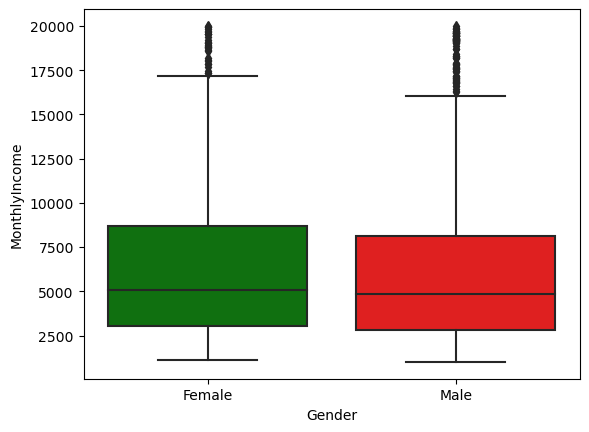

In [82]:
sns.boxplot(data=rh, x='Gender', y='MonthlyIncome', palette=['green', 'red']);
print(f'Média salarial por gênero masculino: {m.MonthlyIncome.mean():.2f}')
print(f'Média salarial por gênero feminino: {w.MonthlyIncome.mean():.2f}')

Observamos pelo boxplot que os valores salariais não possuem muita discrepância em relação aos gêneros, uma vez que o tamanho do boxplot é praticamente o mesmo e a mediana concentra-se em torno de 5 mil dólares.

Quando observamos a distribuição de gênero por departamento da empresa,percebemos que homens estão em maioria nos três deparatamento da empresa, entretanto, colaboradores do sexo Masculino atuam de forma mais predominante no setor de pesquisa e desenvolvimento

In [83]:
pd.crosstab(rh.Department, rh.Gender).style.background_gradient(cmap='summer_r')

Gender,Female,Male
Department,,
Human Resources,20,43
Research & Development,379,582
Sales,189,257


#### Desgaste por gênero

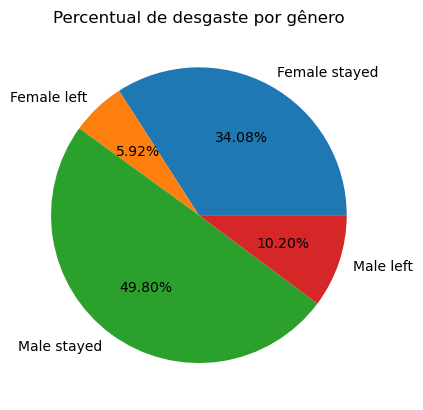

In [84]:
grouped_left_stayed = rh.groupby(['Gender','Attrition'])['Gender'].count()
labels = ['Female stayed', 'Female left', 'Male stayed', 'Male left']
plt.title('Percentual de desgaste por gênero')
plt.pie(grouped_left_stayed, labels=labels, autopct='%1.2f%%');

A proporção de mulheres que permaneceram na empresa é maior que a proporção de homens que decidiram permanecer. Isso por ser melhor observado quando se verifica o percentual de evasão por gênero. Observa-se que saíram da empresa por desgate o dobro de funcionários homens quando comparado ao percentual de evação de mulheres.

### Análise por Geração

Nesta seção tentaremos ver se há alguma peculiaridade entre as gerações que compõem o quadro de funcionários da empresa. 

Para definir uma categorização adequada, usou-se a convenção mostrada na Figura 1

* Baby Boomers - nascidos entre 1940 e 1960 (atualmente com 60 a 80 anos)
* Geração X - nascidos entre 1960 e 1980 (atualmente com 40 a 60 anos)
* Geração Y ou Millennials - nascidos entre 1980 e 1995 (atualmente com 25 a 40 anos)
* Geração Z - nascidos entre 1995 e 2010 (atualmente com 10 a 25 anos)

![Classificação das gerações](Capturar.jpg)

**Questões a serem respondidas nesta seção:**

1. Há alguma discrepância significativa entre as gerações quando se trata de desgaste?
2. Como se comporta  distribuição dos colaboradores por geração x grau de escolaridade?

In [85]:
def classificar_geracao(idade):
    if(idade >= 60):
        return 'baby boomers'
    elif(idade < 60 and idade >= 40):
        return 'X'
    elif(idade < 40 and idade >=25):
        return 'Y'
    else:
        return 'Z'

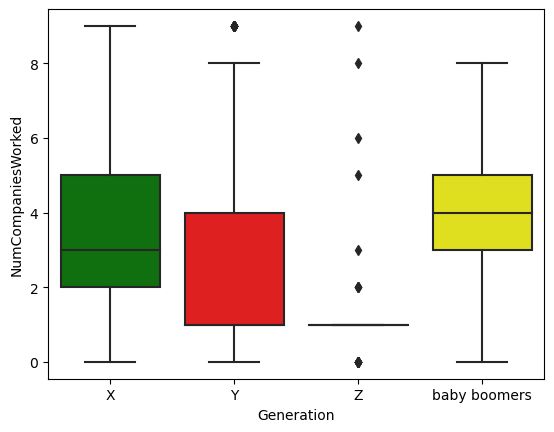

In [86]:
rh['Generation'] = rh.Age.apply(classificar_geracao)

_= sns.boxplot(data=rh, x='Generation', y='NumCompaniesWorked', palette=['green', 'red', 'blue','yellow'])

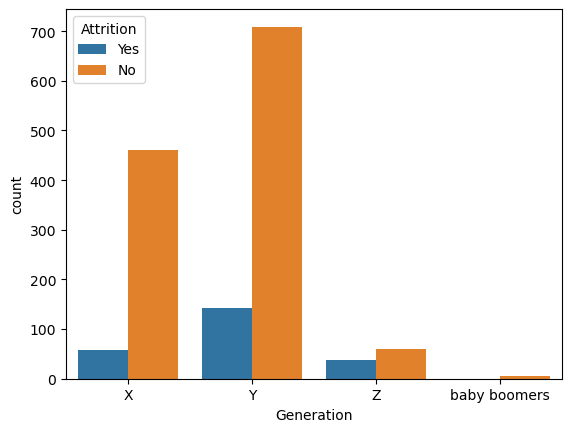

In [87]:
_ = sns.countplot(data=rh, x='Generation', hue='Attrition')

Observamos que para a maioria dos colaboradores da Geração Z esse é o primeiro emprego. Quando analisamos o desgaste, podemos ver que a geração Y é que mais possuem colaboradores com status de desgate com relação ao emprego atual.
Se analisarmos o grau de instatisfação, podemos perceber que a mesma geração com maior desgates (Y) é a que possui um maior número de colaboradores insatisfeitos.

Portanto, quando se fala de insatisfação por classe de gerações, a Geração Y é a mais insatisfeita com a empresa.

In [88]:
pd.crosstab(rh.Generation, rh.JobSatisfaction).style.background_gradient(cmap='summer_r')

JobSatisfaction,1,2,3,4
Generation,,,,
X,102,102,161,152
Y,167,159,248,277
Z,17,19,33,28
baby boomers,3,0,0,2


Para avaliar o grau de escolaridade, temos a seguinte convenção:

* 1 'Below College' (Ensino médio completo)
* 2 'College' (Graduação incompleta)
* 3 'Bachelor' (Graduação completa)
* 4 'Master' (Mestrado)
* 5 'Doctor' (Doutorado)

Quando avaliamos o grau de escolaridade por geração, podemos notar que a geração Y é a que possui maior número de funcionário com grau de escolaridade superior ou mais. 

In [89]:
pd.crosstab(rh.Generation, rh.Education)

Education,1,2,3,4,5
Generation,,,,,
X,33,107,196,159,22
Y,101,153,337,234,26
Z,36,22,37,2,0
baby boomers,0,0,2,3,0


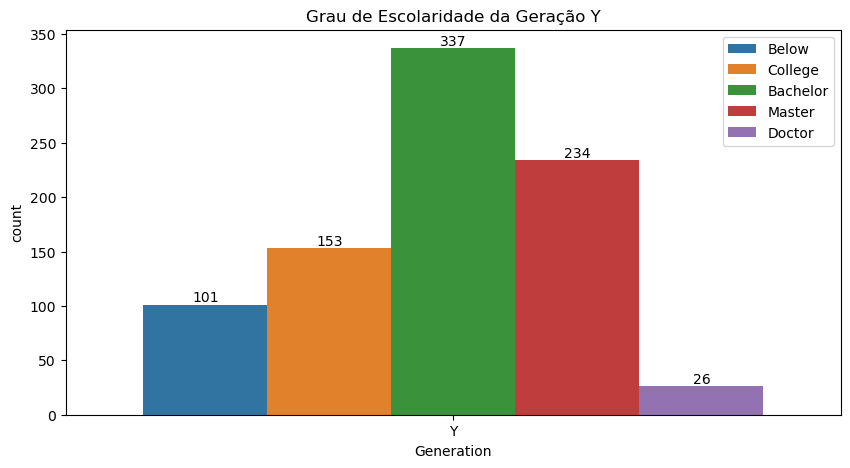

In [90]:
plt.figure(figsize=(10,5))
plt.title('Grau de Escolaridade da Geração Y')
y_generation = rh[rh['Generation'] == 'Y']
_= sns.countplot(data=y_generation, x='Generation', hue='Education')
abs_values = y_generation.groupby(['Generation', 'Education'])['Education'].value_counts(ascending=False).count

for container in _.containers:
    _.bar_label(container)
    
plt.legend(['Below', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()

### Impacto da renda no desgaste

Nesta seção, tentei analisar como os funcionários da empresa caracterizam a importância salarial com relação ao rendimento deles dentro da organização. 

**Questões a serem respondidas nesta seção:**

1. Qual é a renda média mensal por departamento? Existem diferenças significativas entre os colaboradores que saíram da empresa e o que permaneceram?
2. Colaboradores com menores salários foram os que mais evadiram da empresa?
3. Os funcionários que saíram da organização têm uma renda muito menor do que aqueles que permaneceram na organização?
4. Os funcionários com uma classificação de desempenho mais elevada ganham mais do que aqueles com uma classificação de desempenho mais baixa? Essa diferença é significativa por status de desgaste?

In [91]:
rh.groupby(['Department','Attrition'])['MonthlyIncome'].mean()

Department              Attrition
Human Resources         No           7345.980392
                        Yes          3715.750000
Research & Development  No           6630.326087
                        Yes          4108.075188
Sales                   No           7232.240113
                        Yes          5908.456522
Name: MonthlyIncome, dtype: float64

In [92]:
pd.crosstab(rh.Department, rh.Attrition).style.background_gradient(cmap='summer_r')

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


O setor de Pesquisa e desevolvimento foi o que mais teve sinalização de desgate positivo. A média salarial desses colaboradores que deram parecer positivo para o desgate foi de 4108,00 dólares. O segundo maior departamento com desgaste foi o de Vendas. Apesar desse ser o segundo, ele representa a maior média de renda salarial entre os colaboradores com status positivo. Um outro ponto que se pode observar é que há uma discrepância significativa entre as médias salariais por departamento e status de desgate.

No setor de recursos humanos, a renda dos colaboradores que apresentaram desgate positivo representa cerca de 50% do valor da média de renda dos colaboradores com desgate negativo. Já o setor no setor de pesquisa e desenvolvimento, esse valor de média salarial representa cerca de 66% do valor de renda para desgate negativo e, por fim, o setor de Vendas, o valor de média salarial para status positivo representa aproximadamente 82% do valor de rensa para desgaste negativo.

In [93]:
rh.groupby(['Attrition','JobSatisfaction'])['MonthlyIncome'].mean()

Attrition  JobSatisfaction
No         1                  7096.901345
           2                  6834.893162
           3                  6853.311653
           4                  6668.113022
Yes        1                  4752.803030
           2                  4962.760870
           3                  4595.986301
           4                  4943.500000
Name: MonthlyIncome, dtype: float64

Podemos observar que, em média, o salário das pessoas que saíram da empresa alegando um grau de satisfação 3 - High e 4 - Very high são menores que as pessoas que permaneceram na empresa com o mesmo grau de satisfação.

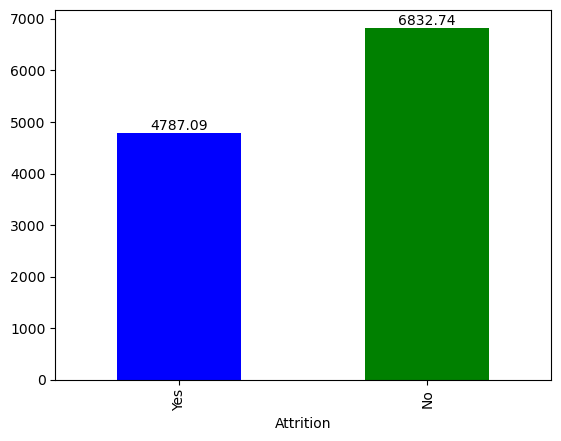

In [94]:
ax = rh.groupby('Attrition')['MonthlyIncome'].mean().sort_values(ascending=True).plot(kind='bar', color=['b','g'])
for i in ax.containers:
    ax.bar_label(i,)

Em média, o salário do colaborador que saiu é 30% menor comparado a média salarial do funcionário que permaneceu.


A classificação de desempenho de um colaborador no dataset é dada como:

* 1 - Low
* 2 - Good
* 3 - Excellent
* 4 - Outstanding

Quando observamos a média salarial por perfomance de desempenho vemos que não há uma discrepância significativa. Um outro ponto a observar é que não há nenhum colaborador na empresa com rendimento baixo ou bom (1 e 2 respectivamente).

In [95]:
rh.groupby('PerformanceRating')['MonthlyIncome'].mean()

PerformanceRating
3    6537.274116
4    6313.893805
Name: MonthlyIncome, dtype: float64

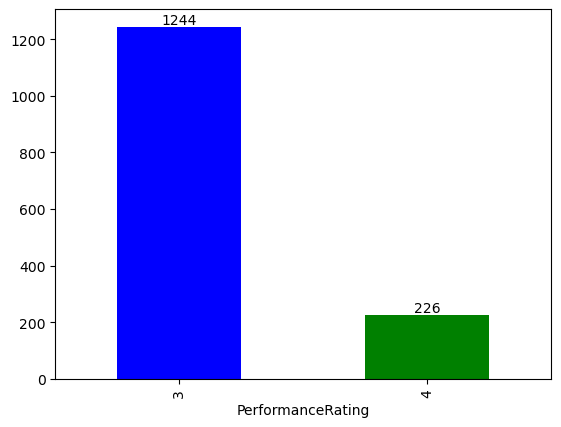

In [96]:
ax = rh.groupby('PerformanceRating')['PerformanceRating'].count().sort_values(ascending=False).plot(kind='bar', color=['b','g'])
for i in ax.containers:
    ax.bar_label(i,)

### Ambiente de Trabalho

Nesta seção final da análise exploratória, tentei levantar alguns insights e questionamentos sobre o ambiente de trabalho e a estrutura da organização.

**Questões a serem respondidas nesta seção:**
1. Quais cargos possuem um maior número de funcionários?
2. Qual a média salarial por cargo?
3. Qual o percentual de desgaste por cargo? Qual cargo possui a maior taxa de desgaste? E qual tem o menor?

In [97]:
#Instalando biblioteca squarify para construção de um Treemap
!pip install squarify

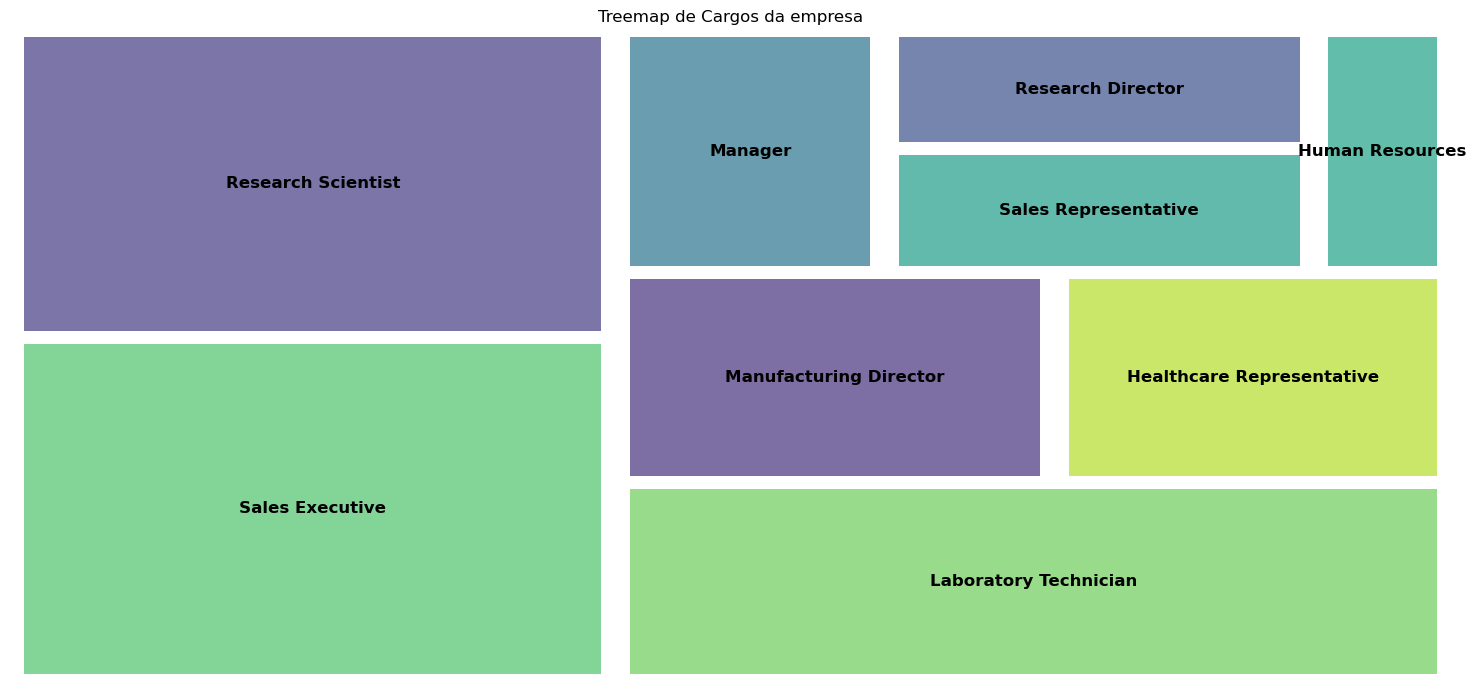

In [98]:
import squarify as sq
count_JobRoles = rh.JobRole.value_counts()
plt.figure(figsize=(15,7))
plt.title("Treemap de Cargos da empresa")
sq.plot(sizes=count_JobRoles, label=count_JobRoles.index, text_kwargs={'fontsize': 12, 'weight':'bold'}, pad=2,alpha=.7)
plt.axis('off')
plt.tight_layout()

Através do Treemap, podemos verificar que os cargos que possuem maior número de colaboradores na empresa são Sales Executive e Research Scientist

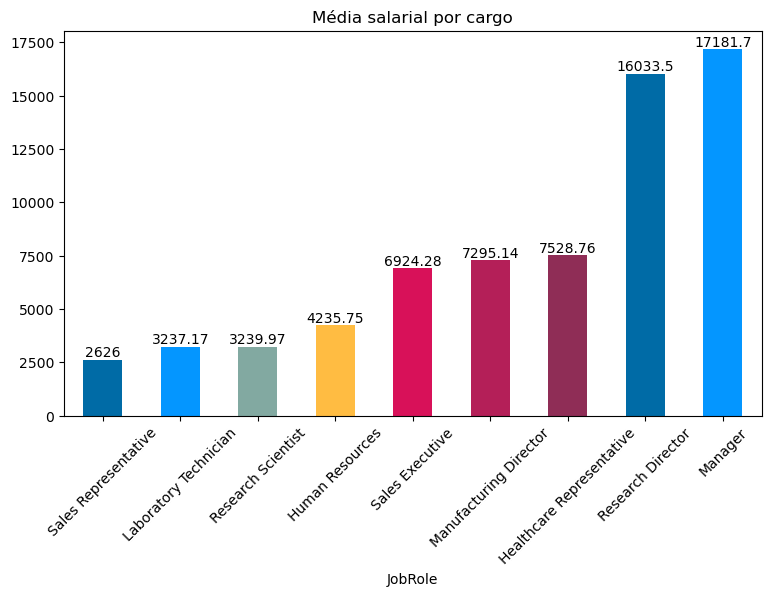

In [99]:
plt.figure(figsize=(9,5))
plt.title('Média salarial por cargo')
colors = ['#006BA6','#0496FF','#82A9A1','#FFBC42','#D81159','#B41F58','#8F2D56']
ax = rh.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=True).plot(kind='bar', color=colors)
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)    

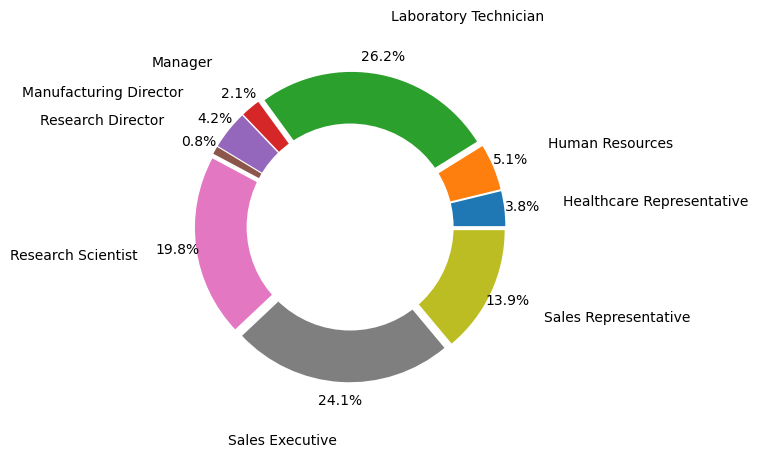

In [100]:
grouped_yes = rh[rh['Attrition']== 'Yes'].groupby(['JobRole','Attrition'])['Attrition'].count()
grouped_no = rh[rh['Attrition']== 'No'].groupby('JobRole').count()
labels = ['Healthcare Representative',
          'Human Resources',
          'Laboratory Technician',
          'Manager',
          'Manufacturing Director',
          'Research Director',
          'Research Scientist',
          'Sales Executive',
          'Sales Representative']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(grouped_yes, labels=labels, autopct='%1.1f%%',pctdistance=1.125,explode=explode, labeldistance=1.4)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

Os dois cargos com maiores taxas percentuais de desgate são os técnicos de laboratório e executivos de vendas. Em contrapartida, Diretores de pesquisa são os que possuem uma menor taxa percentual de desgaste.

## Correlações

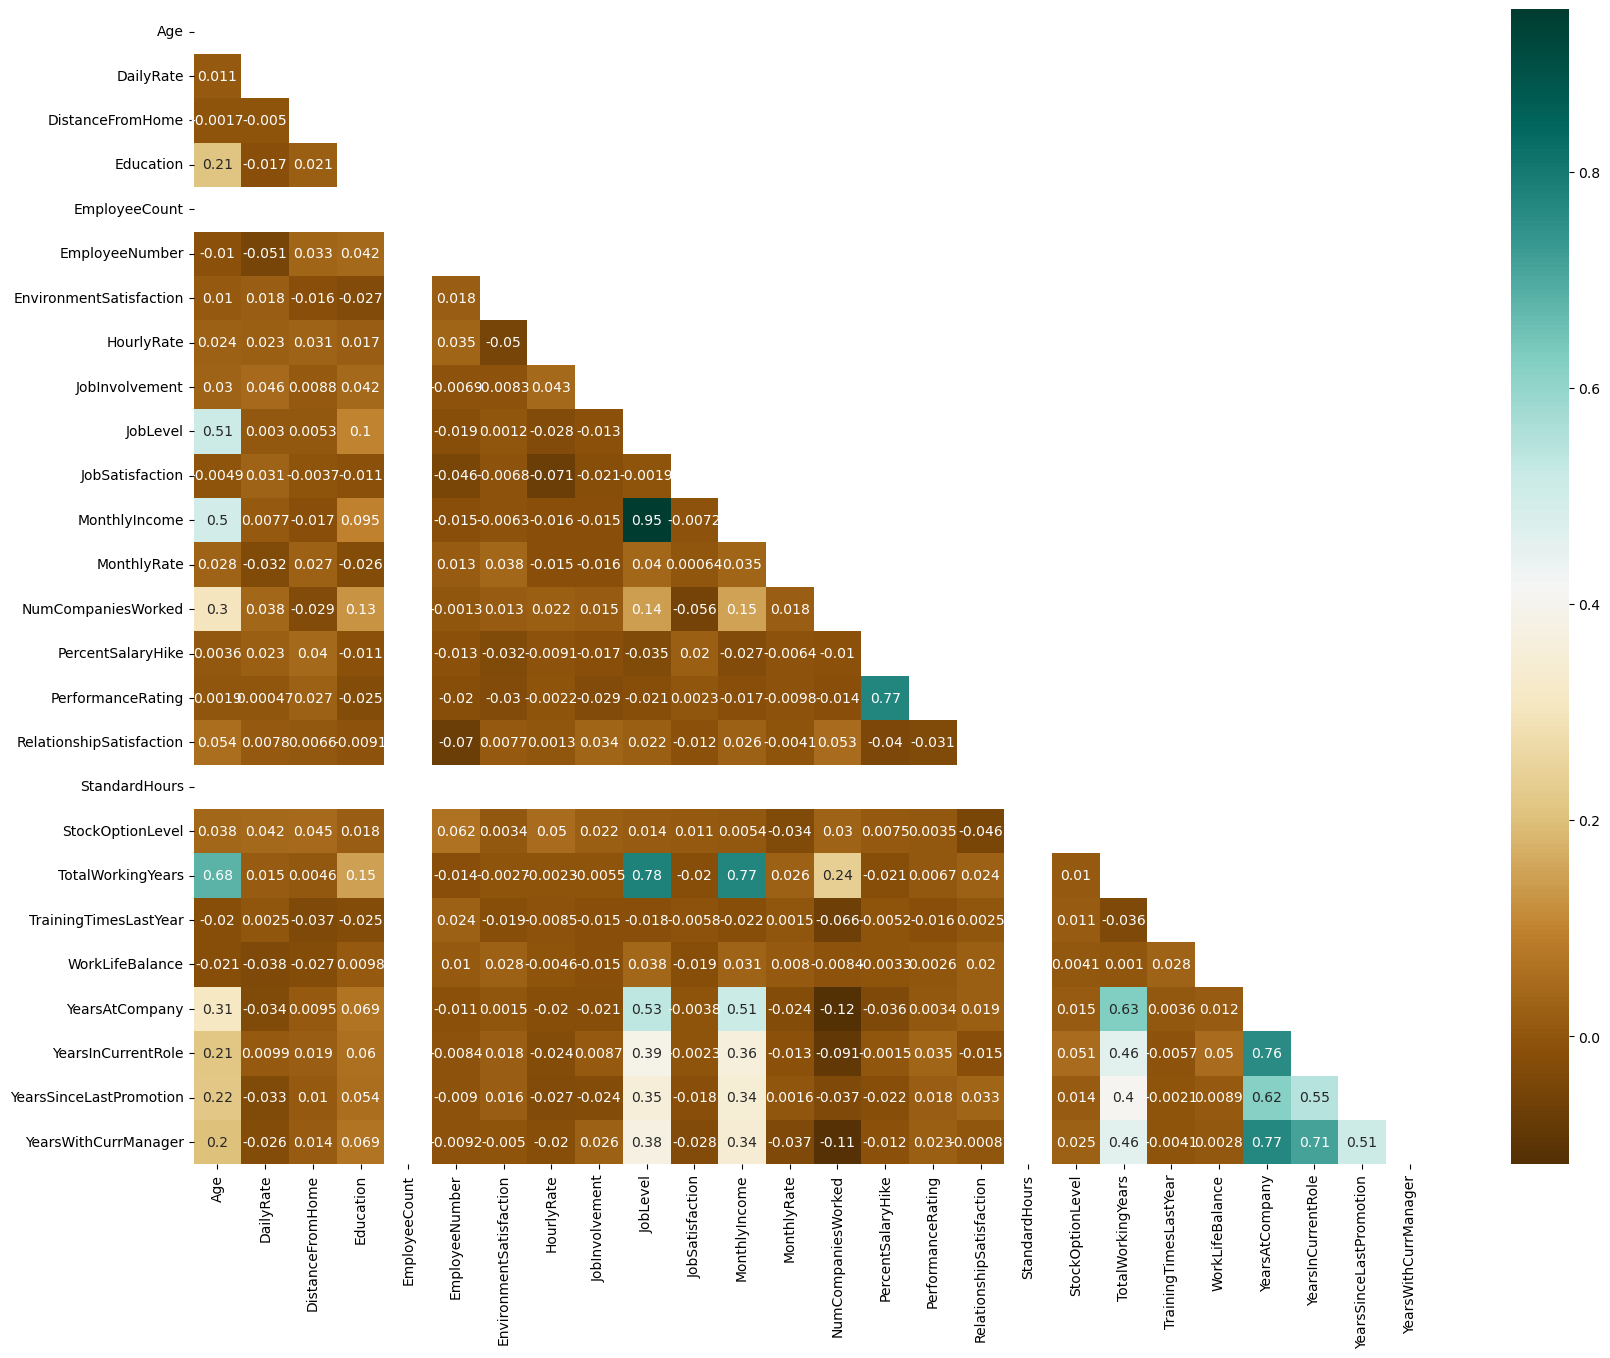

In [101]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(rh.corr()))
sns.heatmap(rh.corr(), annot=True,cmap='BrBG', mask = mask);

Podemos extrair algumas correlações importantes entre as variáveis do dataset:

* Quanto maior o cargo, maior a renda mensal;
* Quanto mais anos trabalhados na empresa, maior a renda mensal;
* Quanto mais velho é o colaborador, maior a renda mensal;
* Quanto maior o desempenho do colaborador, maior será o percentual de aumento salarial.